In [1]:
#source: https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

<h1>Modelo ARIMA </h1>
O modelo é a mistura do moving average(MA) 
$$ y_{t} = \mu + \epsilon_{t} + \theta_1 \epsilon_{t-1} + \cdots + \theta_1 \epsilon_{t-q} $$
(onde $\theta$ são os parâmetros e $\epsilon$ o white noise)
com o AutoRegressivo model (AR) 
$$y_{t} = \beta_{1} y_{t} + \beta_{2} y_{2} + \cdots + \beta_{p} y_{p}  $$
Isso dá o modelo ARMA. O I é de quantas vezes a série precisa ser diferenciada para ser estacionária.

In [2]:
df = pd.read_csv('C:\\Users\\vinic\\Desktop\\R\\timeseries_models\\datasets\\AirPassengers.csv', parse_dates = ['Month'], 
                 index_col = ['Month'])
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


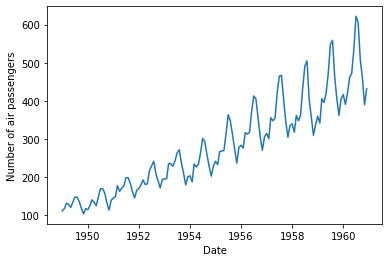

In [3]:
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(df)

In [4]:
rolling_mean = df.rolling(window=12).mean() #média móvel
rolling_std = df.rolling(window=12).std()   #desvio padrão dos últimos 12

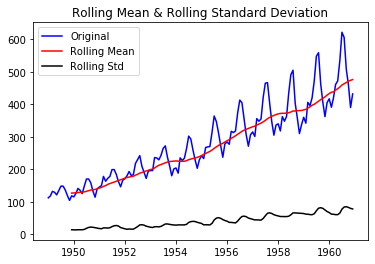

In [6]:
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [21]:
#dickey fuller aumentada na original, não é estacionaria

result = adfuller(df['#Passengers']) #longe dos valores criticos
print('ADF Statistic: {}'.format(result[0])) #acima de 0.05
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: 0.8153688792060428
p-value: 0.9918802434376409
Critical Values:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598


In [14]:
#log-diferenciando

df_log = np.log(df).diff()
df_log = df_log.drop(df_log.index[0])
df_log 

Text(0.5, 1.0, 'Log diff')

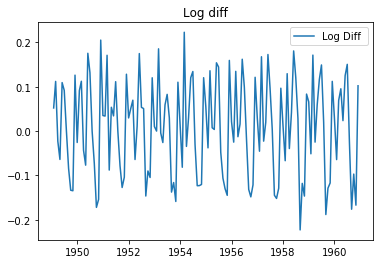

In [18]:
plt.plot(df_log['#Passengers'], label = 'Log Diff ')
plt.legend(loc = 'best')
plt.title('Log diff')

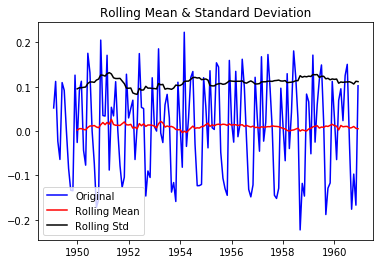

ADF Statistic: -2.717130598388125
p-value: 0.07112054815086002
Critical Values:
	1%: -3.4825006939887997
	5%: -2.884397984161377
	10%: -2.578960197753906


In [23]:
#os mesmos testes no df log diff
rolling_mean = df_log.rolling(window=12).mean()
rolling_std = df_log.rolling(window=12).std()
    

original = plt.plot(df_log, color='blue', label='Original')
mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
std = plt.plot(rolling_std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [47]:
result = adfuller(df_log['#Passengers'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))          #já é estacionária
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -1.7170170891069667
p-value: 0.42236677477038814
Critical Values:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598


In [42]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['#Passengers'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

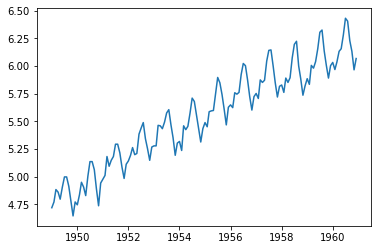

In [41]:
df_log = np.log(df)
plt.plot(df_log)

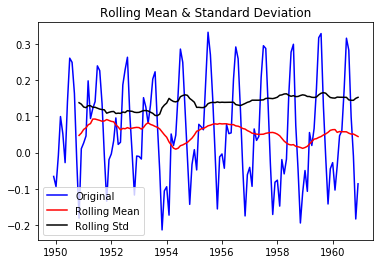

ADF Statistic: -3.162907991300841
p-value: 0.022234630001244933
Critical Values:
	1%: -3.4865346059036564
	5%: -2.8861509858476264
	10%: -2.579896092790057


In [43]:
rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)

get_stationarity(df_log_minus_mean)



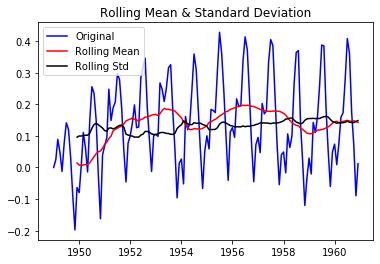

ADF Statistic: -3.601262420161678
p-value: 0.005736938801511859
Critical Values:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598


In [44]:
#exponential smoothing
rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)


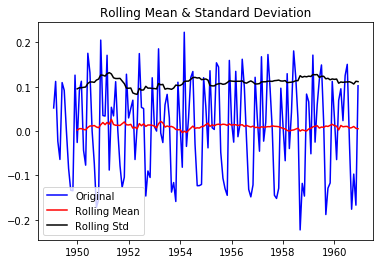

ADF Statistic: -2.717130598388125
p-value: 0.07112054815086002
Critical Values:
	1%: -3.4825006939887997
	5%: -2.884397984161377
	10%: -2.578960197753906


In [45]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


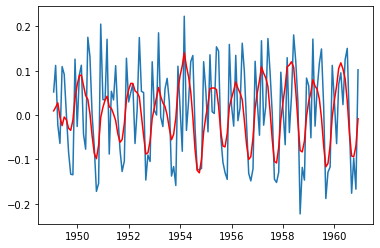

In [46]:
decomposition = seasonal_decompose(df_log) 
model = ARIMA(df_log, order=(2,1,2))
results = model.fit(disp=-1)
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')

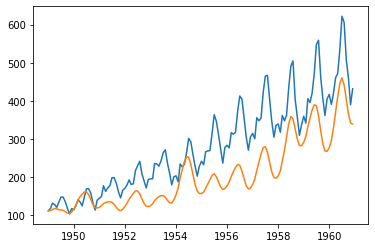

In [33]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(df_log['#Passengers'].iloc[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df)
plt.plot(predictions_ARIMA)

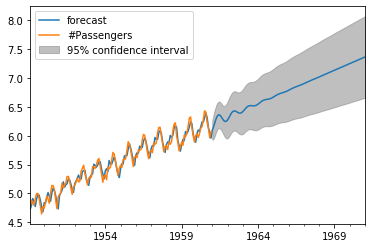

In [35]:
results.plot_predict(1,264); #Given that we have data going 
                             #for every month going back 12 years and want to 
                             #forecast the number of passengers 
                             #for the next 10 years, we use (12 x12)+ (12 x 10) = 264.